 # Proyecto 2 Introducción a la Inteligencia Artificial

Presentado por:<br>
David Crespo <br>
Cristina Mejia <br>
Melissa Fuentes <br>

El objeto de este proyecto es alicar los conceptos de aprendizaje de máquina vistos en el curso. Se hará el entrenamiento de modelos de clasificación usando árboles de decisión, naive bayes y redes neuronales para resolver un problema de clasificación a partir de un conjunto de datos relacionados a enfermedades del corazón.

El primer paso será importar las librerías básicas

In [134]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pydotplus 
from IPython.display import Image
from sklearn.naive_bayes import GaussianNB


Ahora debemos cargar los datos que se encuentran en el archivo "heart.csv", y luego se convierten en un data frame de la librería Pandas.

In [153]:
heartDataCSV = pd.read_csv("heart.csv")
heartData = pd.DataFrame(heartDataCSV)

In [154]:
#Primeros valores en la tabla
print(heartData.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [155]:
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Gráficas

Histogramas:

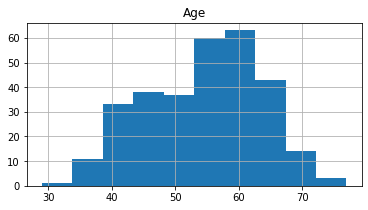

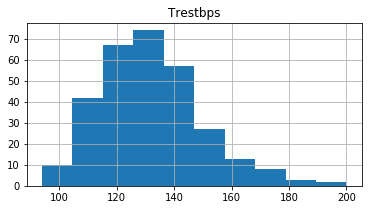

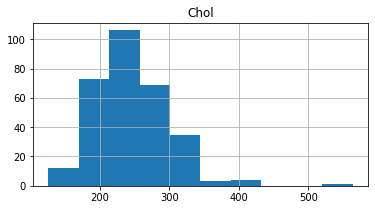

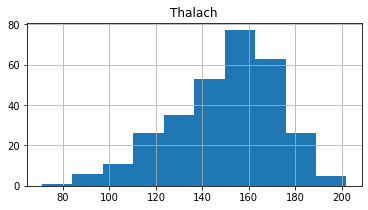

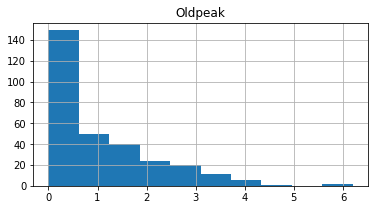

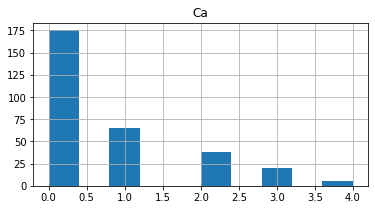

In [149]:
heartData["age"].hist(figsize=(6,3))
plt.title('Age')
plt.show()
heartData["trestbps"].hist(figsize=(6,3))
plt.title('Trestbps')
plt.show()
heartData["chol"].hist(figsize=(6,3))
plt.title('Chol')
plt.show()
heartData["thalach"].hist(figsize=(6,3))
plt.title('Thalach')
plt.show()
heartData["oldpeak"].hist(figsize=(6,3))
plt.title('Oldpeak')
plt.show()
heartData["ca"].hist(figsize=(6,3))
plt.title('Ca')
plt.show()

Diagramas de torta:

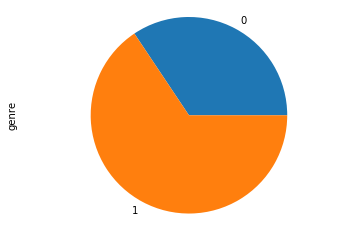

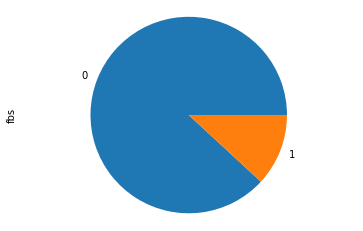

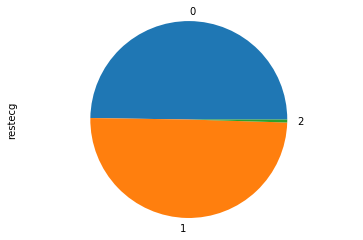

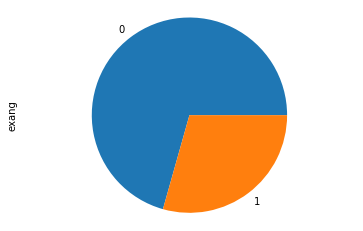

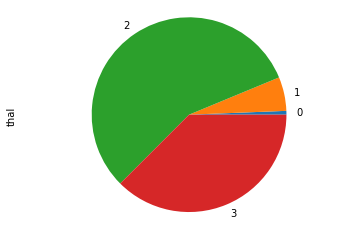

In [152]:
heartData.restecg.groupby(heartData.sex).sum().plot(kind = 'pie')
plt.axis('equal')
plt.ylabel('genre')
plt.show()
heartData.restecg.groupby(heartData.fbs).sum().plot(kind = 'pie')
plt.axis('equal')
plt.ylabel('fbs')
plt.show()
heartData.sex.groupby(heartData.restecg).sum().plot(kind = 'pie')
plt.axis('equal')
plt.ylabel('restecg')
plt.show()
heartData.restecg.groupby(heartData.exang).sum().plot(kind = 'pie')
plt.axis('equal')
plt.ylabel('exang')
plt.show()
heartData.restecg.groupby(heartData.thal).sum().plot(kind = 'pie')
plt.axis('equal')
plt.ylabel('thal')
plt.show()

## Organización de conjunto de datos

A continuación se analaizará el conjunto de datos para considerar si hace falta completar o remover elementos faltantes o nulos.

In [157]:
heartDataCSV = pd.read_csv("heart.csv")
x = pd.notnull(heartDataCSV)  
heartDataCSV[x]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Gracias a la función notnull, podemos mostrar todo nuestro conjunto de datos cuya celda sea distinta de NaN, y como nos retorna las 303 filas en total con las 14 columnas, podemos decir que nuestro conjunto de datos no tenia regitros faltantes, por lo que concluimos que no hubo necesidad de realizar ninguna modificación al conjunto de datos.


Ahora a continuación partiremos los datos en dos grupos. El 80% de ellos para entrenamiento y el 20% para pruebas.

In [189]:

variables = heartData[['age','sex','cp','trestbps', 'chol', 'fbs', 'restecg',
                      'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
target = heartData['target'].values


# Se dividen los datos en test y training
trainX, testX, trainY, testY = train_test_split(variables, target, test_size=0.2)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(242, 13) (242,)
(61, 13) (61,)


## Árboles de decisión

In [226]:
#Arbolito bonito

arbolModel = DecisionTreeClassifier(max_depth = 8, min_samples_split =5)
arbolModel.fit(trainX, trainY)

#Imprimir puntaje entrenamiento
print("Exactitud en el entrenamiento:")
print(arbolModel.score(trainX, trainY))
#Imprimir puntaje prueba
print("Exactitud en la prueba:")
print(arbolModel.score(testX, testY))

Exactitud en el entrenamiento:
0.9793388429752066
Exactitud en la prueba:
0.8360655737704918


Matriz de confusión:

In [227]:
#Matriz de confusión


confusion_matrix(arbolModel.predict(testX), testY)

array([[23,  0],
       [10, 28]], dtype=int64)

Ahora guardaremos un archivo de tamaño dot que almacena los nodos que conforman el árbol, y posteriormente se carga con la librería pydotplus

In [228]:
targetNames = ['age','sex','cp','trestbps', 'chol', 'fbs', 'restecg',
                      'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
classNames = ['0', '1']
export_graphviz(arbolModel, out_file='arbol.dot', class_names=classNames,
                feature_names=targetNames , impurity=False, filled=True)

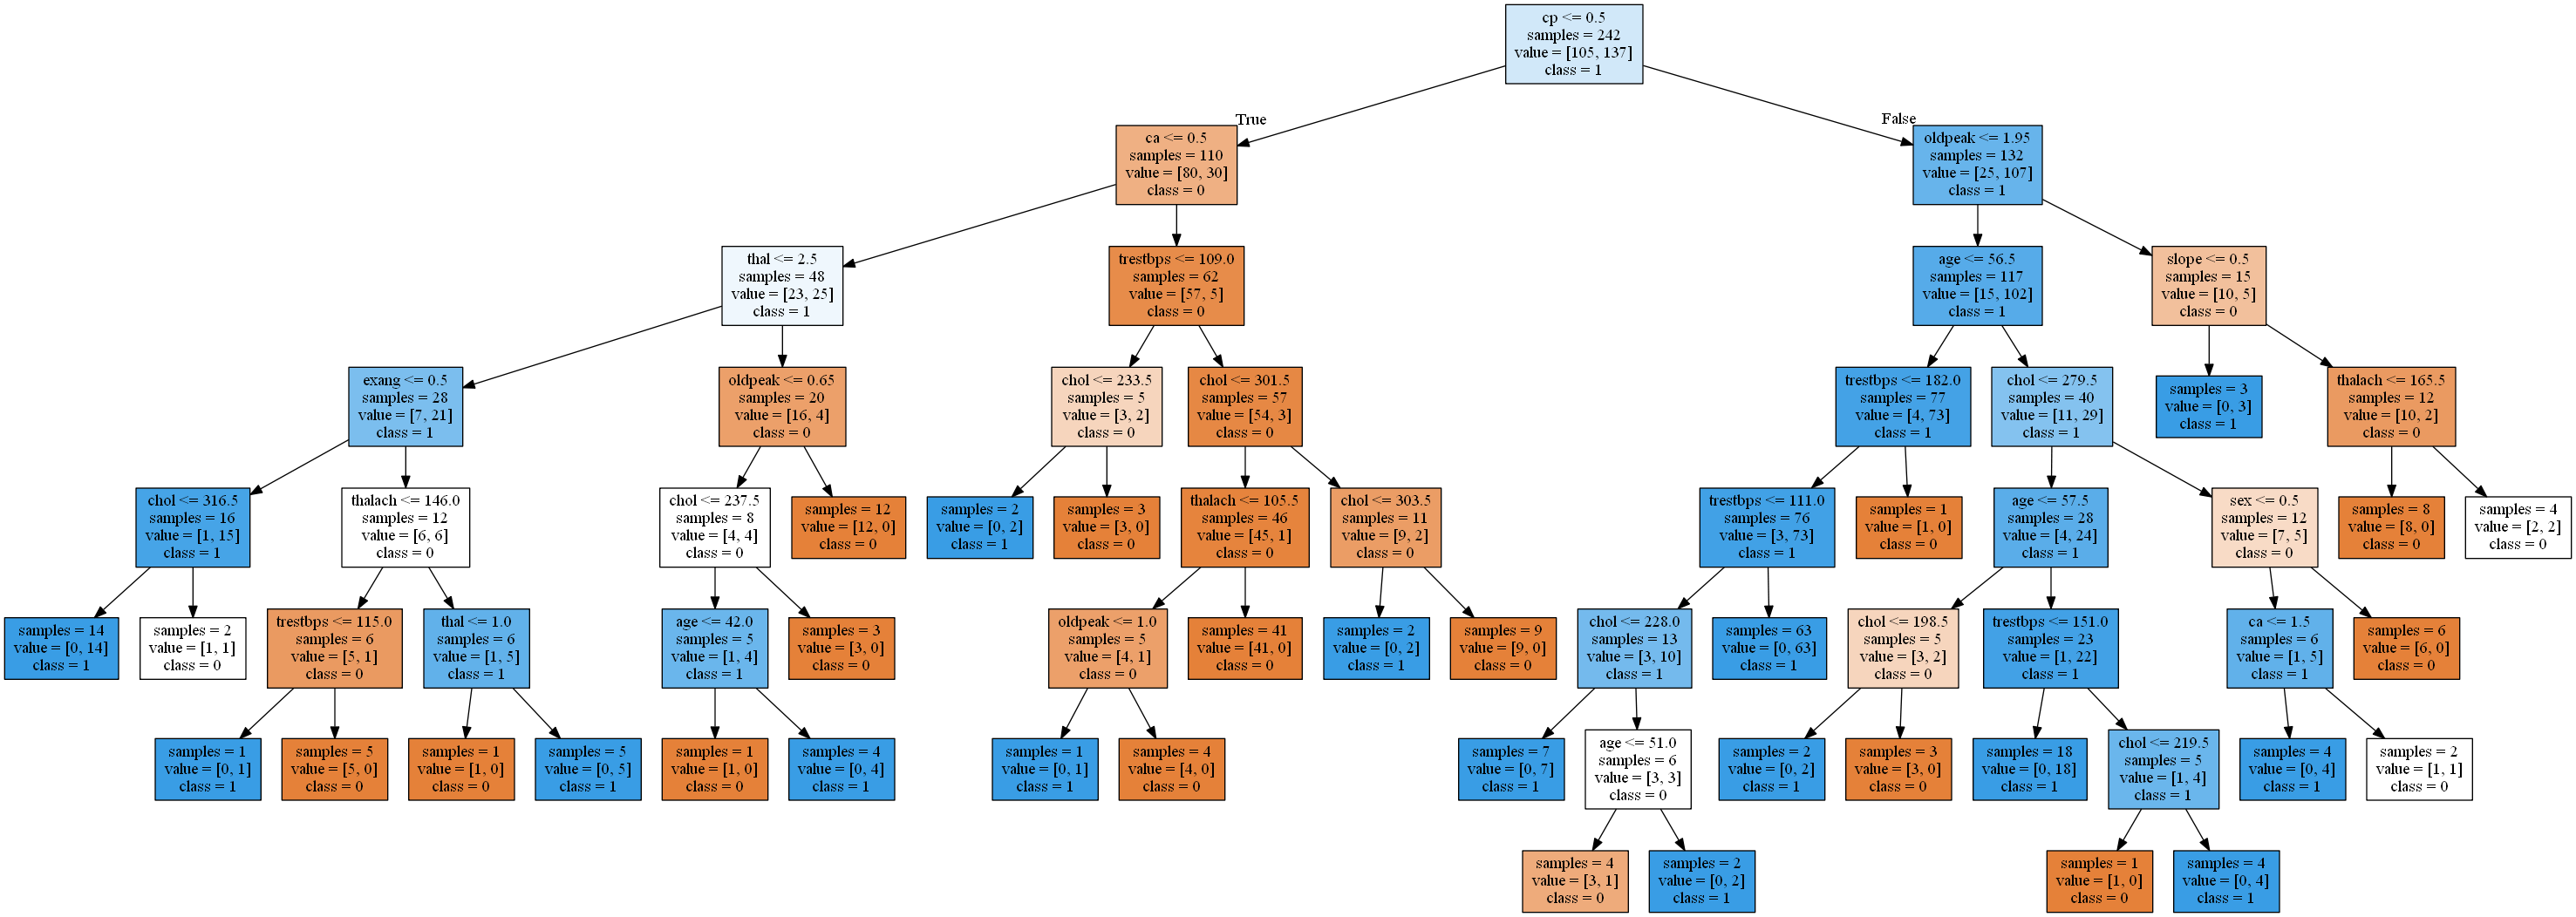

In [229]:

pydot_graph = pydotplus.graph_from_dot_file("arbol.dot")
Image(pydot_graph.create_png())

([<matplotlib.axis.YTick at 0x2989a99e898>,
 <a list of 13 Text yticklabel objects>)

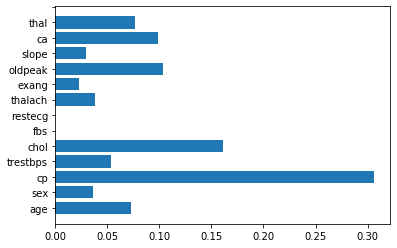

In [244]:
arrayImportancia = np.array(arbolModel.feature_importances_)
plt.barh(range(13), arrayImportancia)
plt.yticks(np.arange(caract), targetNames)

## Naive Bayes

In [166]:
#Entrenamos un modelo de Naive Bayes


gnb = GaussianNB()

modeloBayes = gnb.fit(trainX, trainY)

#Mostramos el score del nuevo arbol de desición 
print("Exactitud en el entrenamiento:")
print(modeloBayes.score(trainX, trainY))

print("Exactitud en la prueba:")
print(modeloBayes.score(testX, testY))


Exactitud en el entrenamiento:
0.8388429752066116
Exactitud en la prueba:
0.7704918032786885


In [167]:

#Mostramos la matriz de confusión para el modelo 
confusion_matrix(modeloBayes.predict(testX), testY)


array([[19,  5],
       [ 9, 28]], dtype=int64)

Podemos interpretar la matríz de confusión de la siguiente forma:

Verdaderos negativos(0,0) = 19
Falsos negativos(1,0) = 9
Verdaderos positivos(1,1) = 28
Falsos positivos(0,1) = 5

Como la función que utilizamos para el modelo de Bayes no recibe parametros, esta no es parametrizable y por lo tanto no se le puede hacer una representación visual.

-------Aqui iria lo de redes neuronales---------------


Comparación de los 3 métodos

El score que sacamos de cada método nos indica la presición con la cual trabaja tanto en el momento de entrenamiento como en el de pruebas, siendo el mejor score aquel que se aproxime más a 1:

Para el arbol de desición tenemos un score de entrenamiento de 0.9793388429752066 y un score de pruebas de 0.8360655737704918, 
los cuales son valores bastantes cercanos a 1.

Para el modelo Naive Bayes obtuvimos un score de precisión para el enrenamiento de 0,8388429752066116 y un score para las pruebas de 0,7704918032786885, comparado a los score del arbol de desición, la presicón del modelo de Bayes se ve reducida con una diferencia de 

--Comparación score redes neuronales--

En cuanto a la estabilidad obtenemos una variabilidad entre los score del arbol de desición de 0,1432732692702886.

Sacamos la variabilidad para el modelo de Naive Bayes y este nos da una diferencia de 0,0683511719279231‬, la cual es menor comparada a la anterior tomada para el arbol de desición